In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sy

In [115]:
def runge_kutta(function, y0: np.ndarray | float, time_space: np.ndarray, h: float) -> tuple[np.ndarray, np.ndarray]:
    num = len(time_space)
    x_a = time_space

    y_a = [y0] * (num)

    for i in range(num - 1):
        k0 = function(x_a[i], y_a[i])
        k1 = function(x_a[i] + h / 2, y_a[i] + h * k0 / 2)
        k2 = function(x_a[i] + h / 2, y_a[i] + h * k1 / 2)
        k3 = function(x_a[i] + h, y_a[i] + h * k2)
        y_a[i + 1] = y_a[i] + h / 6 * (k0 + 2 * k1 + 2 * k2 + k3)

    return x_a, np.array(y_a)

In [190]:
n = 4 # 0 - 3
q = n - 1
print(f"{q=}")

Q = 250
alpha = np.array([0.6, 0.8, 1., 1.2]) # n
k = np.append([0], [0.1, 0.2, 0.3]) # n-1, 0<=k_i<=1
m = np.append([0], [1, 1, 1]) # n-1

g = np.append([0], k[1:] * alpha[:-1] / alpha[1:])
H = np.append([0], [ np.prod(g[2-(i%2):i+2:2]) for i in range(1, n) ])

mu =np.append([0], m[1:] / alpha[1:])
f = np.append([0], [ sum(mu[2-(i%2):i+2:2]/H[2-(i%2):i+2:2]) for i in range(1, n) ])

N = np.zeros(n)

if q % 2 == 0:
    N[0] = Q / ( alpha[0] * f[q] )
    N[1] = f[q]
else:
    N[0] = f[q]
    N[1] = Q / ( alpha[0] * f[q] )


for s in range(1, n//2):
    N[s*2] = H[2*s-1] * (N[0] - f[2*s-1])
    N[s*2+1] = H[2*s] * (N[1] - f[2*s])

alpha, k, m,

q=3


(array([0.6, 0.8, 1. , 1.2]), array([0. , 0.1, 0.2, 0.3]), array([0, 1, 1, 1]))

In [191]:
print(N)
print( Q, cmp:= alpha[0] * f[q-1] * f[q], Q > cmp )

[61.11111111  6.81818182  3.33333333  0.09090909]
250 229.16666666666663 True


In [192]:
# unlocked chain
def right_ul(t, x):
    return np.append(
        [Q - alpha[0] * x[0] * x[1]],
        [
            x[i] * (-m[i] + k[i] * alpha[i-1] * x[i-1] - (alpha[i] * x[i+1] if i < n-1 else 0 ))
            for i in range(1, n)
        ]
    )

In [199]:
t_s, h = np.linspace(0, 20, num=10000, endpoint=False, retstep=True)
N0 = np.array([ 10 ] * n)

Tl, Nl = runge_kutta(right_ul, N0, t_s, h)

[61.51450075  6.77483681  3.36259012  0.08506631]


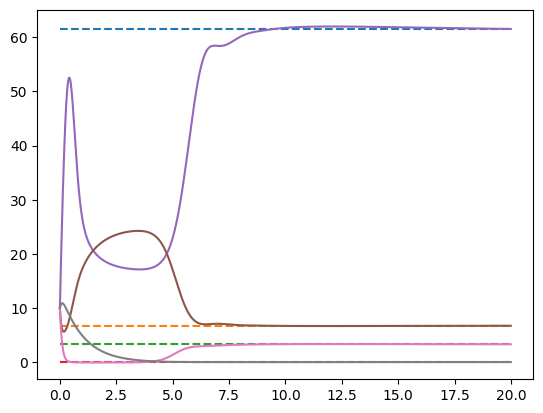

In [200]:
slc = -1
target = Nl[slc-1 if slc - 1 > 0 else -1]
print(target)

start = 0

for i in range(start,n):
    plt.plot([0, Tl[slc-1]], [target[i]]*2, "--")

for i in range(start,n):
    plt.plot(Tl[:slc], Nl[:slc,i])